In [2]:
import qiskit as q
from qiskit import IBMQ
%matplotlib inline
IBMQ.save_account("5bd4ecfdc74e6680da7c79998259781431661e5326ae2f88eea95dee8f74b87530ba63fbca8105404de4ffd36e4b484631907acff73c805580928218a5ccf0b3")
# Details in: https://qiskit.org/documentation/install.html 

configrc.store_credentials:WARNING:2021-08-24 12:30:32,469: Credentials already present. Set overwrite=True to overwrite.


In [3]:
# https://quantumcomputing.stackexchange.com/questions/7098/loading-qiskit-account-in-the-jupyter-notebook-gives-requestsapierror-error
'''
IBMQ.delete_account()
IBMQ.active_account()
'''

'\nIBMQ.delete_account()\nIBMQ.active_account()\n'

In [4]:
API_KEY = "5bd4ecfdc74e6680da7c79998259781431661e5326ae2f88eea95dee8f74b87530ba63fbca8105404de4ffd36e4b484631907acff73c805580928218a5ccf0b3"
IBMQ.save_account(API_KEY, overwrite=True)

In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
circuit = q.QuantumCircuit(2,2) # 2 qubits, 2 classical bits

# Currently: 0,0
circuit.x(0) # Creates quantum bit of 0,1 or any combination of both
#1,0
circuit.cx(0,1) #cnot, controlled not, Flibs 2nd qubit value if first quibit is 1

#1,1
circuit.measure([0,1],[0,1]) # Observer performs measurements between the qubit and classical bit

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

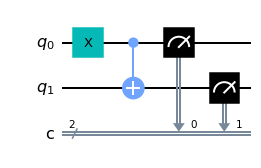

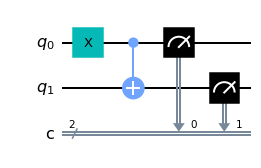

In [7]:
#  pip install pylatexenc
circuit.draw(output = "mpl")

In [8]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().quibits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and { qubit_count} qubits")

ibmq_qasm_simulator has 4 queued and simulated qubits
ibmq_armonk has 1 queued and simulated qubits
ibmq_santiago has 229 queued and simulated qubits
ibmq_bogota has 3 queued and simulated qubits
ibmq_lima has 1 queued and simulated qubits
ibmq_belem has 6 queued and simulated qubits
ibmq_quito has 8 queued and simulated qubits
simulator_statevector has 4 queued and simulated qubits
simulator_mps has 4 queued and simulated qubits
simulator_extended_stabilizer has 4 queued and simulated qubits
simulator_stabilizer has 4 queued and simulated qubits
ibmq_manila has 6 queued and simulated qubits


In [9]:
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend("ibmq_bogota")
job = q.execute(circuit, backend, shots = 500)
job_monitor(job)

Job Status: job has successfully run


In [11]:
from qiskit.visualization import plot_histogram
from matplotlib import style

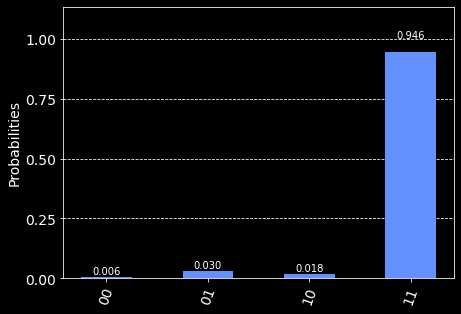

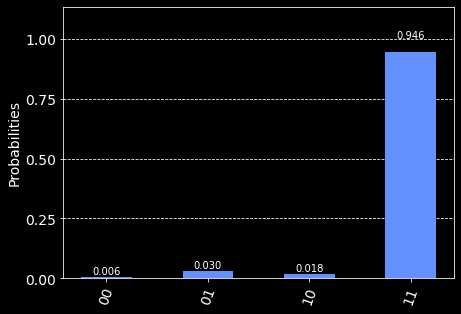

In [13]:
style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [14]:
# Currently: 0,0
circuit.h(0) # Creates quantum bit of 0,1 or any combination of both
#1,0
circuit.cx(0,1) #cnot, controlled not, Flibs 2nd qubit value if first quibit is 1

#1,1
circuit.measure([0,1],[0,1]) # Observer performs measurements between the qubit and classical bit

circuit.draw()

┌───┐     ┌─┐┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘└┬─┬┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫──┤M├─┤ X ├─╫─┤M├
          └───┘ ║  └╥┘ └───┘ ║ └╥┘
c: 2/═══════════╩═══╩════════╩══╩═
                0   1        0  1

In [15]:
job = q.execute(circuit, backend, shots = 500)
job_monitor(job)

Job Status: job has successfully run


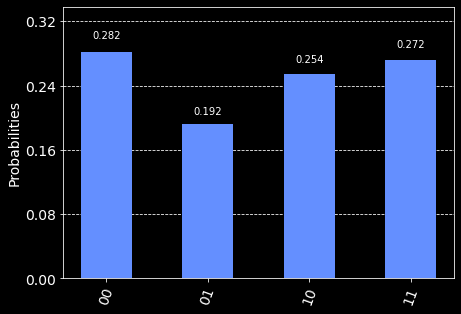

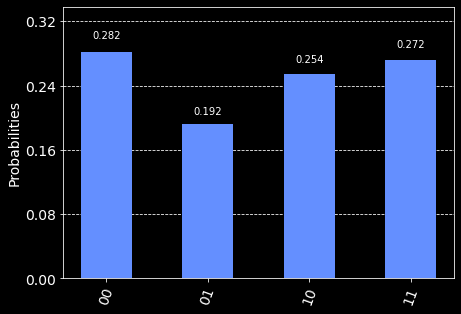

In [16]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])